# Scikit-Learn Compendio Selección de algoritmos

## **1. Scikit-learn para regresión**

**Paso 1**: El primer paso es importar las librerñias y módulos.

In [ ]:
import sklearn
import pandas as pd
from sklearn import datasets

**Paso 2**: Cargar los datos y establecer los nombres de columna.
- Luego se puede crear un dataframe para las características "diabetes.data".
- Después, almacenar los valores objetivo por separado.

In [ ]:
diabetes = datasets.load_diabetes()
columns = "age sex bmi map tc ldl hdl tch ltg glu".split()
x = pd.DataFrame(diabetes.data, columns=columns) 
y = diabetes.target
x.head()


**Paso 3:**  Separar datos para entrenamiento y pruebas
- Aquí, X tiene las variables independientes e Y tiene la variable dependiente.
- En cualquier modelado, es una práctica común reservar cierta cantidad de datos para prueba.
- Sklearn proporciona `train_test_split()` que dividirá aleatoriamente los datos en conjuntos de entrenamiento y prueba.
- Se puede ajustar el tamaño del conjunto de pruebas utilizando el parámetro "test_size".

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

**Paso 4**: Entrenar el modelo.
- Hay multitud de opciones para escoger.

### Regresión lineal
La regresión lineal es el método más común para el aprendizaje supervisado. 
- Ajustamos en una línea de regresión con los puntos de datos disponibles.
- Es fácil de interpretar, rentable y se usa como línea de base en cualquier caso comercial.

Importar la clase modelo desde el módulo lineal_model de Sklearn. Inicializar y ajustar los datos de entrenamiento: con `fit`

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

- Usar el modelo entrenado para hacer predicciones de datos nuevos.
- Y evaluarlo usando la función `score`.

In [ ]:
predictions = model.predict(X_test)
model.score(X_test, y_test)

### Regresión Ridge
Ridge es una versión mejorada de regresión lineal.
- Elimina algunos problemas de la metodología OLS (ordinary least squares [mínimos cuadrados ordinarios]).
- También impone una penalización a los coeficientes de rango con el parámetro *alfa*.
- Este coeficiente juega un papel vital en el cálculo de la suma residual de cuadrados para la regresión de la cresta, lo que hace que el modelo sea robusto.

In [ ]:
from sklearn import linear_model
model = linear_model.Ridge(alpha=.5)
model.fit(X_train, y_train)

### Regresión Polynomial
Los datos modernos a menudo son complejos con patrones no lineales que no pueden ser modelados por modelos lineales simples. 
- Las regresiones polinómicas son modelos en los que ajustamos una curva de mayor grado a los datos. 
- Hace que el modelo sea más flexible y escalable. 
- Para implementar esto en Scikit-Learn, debe usar el componente de *pipeline*. 
- Se Puede definir el grado polinomial requerido en el pipeline.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
        ('linear', LinearRegression(fit_intercept=False))])
model.fit(X_train, y_train)

### Support vector regression (SVR)
SVMs se desarrollaron inicialmente para problemas de clasificación, pero también se han extendido para aplicarlos a la regresión.
- Estos modelos se pueden usar cuando se tiene una dimensión grande de características. 
- Proporcionan diferentes opciones de kernel según los requisitos.

In [ ]:
from sklearn import svm
model = svm.SVR()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

### Regresión del árbol de decisión (Decision tree)
Es un modelo basado en árboles donde los datos se dividen en subgrupos basados ​​en la homogeneidad.
- Se puede importar este modelo desde el módulo de árboles de Sklearn.
- Para evitar el sobreajuste, utilizar el parámetro `max_depth`, que decide la profundidad máxima del árbol de decisión.
- Si el valor es demasiado alto, el modelo puede ajustar a los ruidos y funcionar mal en un conjunto de datos de prueba.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=12)
model.fit(X_train, y_train)

### Regresión de bosque aleatorio (Random Forest)
Los modelos de árboles de decisión generalmente son mejorados a un nivel superior al combinar múltiples modelos.
- Estos son métodos de aprendizaje de agrupación.
- Se pueden clasificar ampliamente en algoritmos de *boosting* y *bagging*.
- Los modelos base son *aprendices débiles*, y al combinar múltiples aprendices, obtenemos el modelo final de *aprendizaje fuerte*.
- El módulo *`ensemble`* tiene todas estas funciones en Sklearn.
- `N_estimators` es un parámetro importante que decide el número de árboles de decisión que requieren entrenar.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=10, max_features=2, max_leaf_nodes=5,random_state=42)
model.fit(X_train, y_train)

## **2. Scikit learn para la clasificación**

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()
x = pd.DataFrame(iris.data) 
y = iris.target 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Regresión logística
Es un modelo lineal, desarrollado a partir de la regresión lineal para abordar los problemas de clasificación.
- Utiliza la técnica de *regularización predeterminada*.
- Cuando aplicamos esto a los problemas de clasificación multiclase, utiliza la estrategia *One vs Rest*.
- Aquí, los clasificadores binarios separados son entrenados para cada clase, convirtiéndolos en una clasificación binaria en el nivel base.

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=13)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

### Clasificadores de vector de soporte (Support Vector Classifier)

Los clasificadores SVM se usan popularmente para problemas de clasificación con una alta dimensión de características.
- Pueden transformar el espacio de características en una dimensión superior utilizando la función *kernel*.
- Hay múltiples opciones de kernel disponibles, incluidos lineal, RBF (radial base function), polinomio, etc.
- También podemos afinar el parámetro `gamma`, que es el coeficiente de kernel.

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel ='rbf'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

### Clasificador Naive Bayes 

El "Gaussian Naive Bayes" es un algoritmo de clasificación popular.
- Aplica el teorema de la probabilidad condicional de Bayes.
- Se supone que las características son independientes entre sí, mientras que los objetivos dependen de ellos.

In [12]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

### Clasificador de árbol de decisión
Esta es una estructura basada en árboles, donde un conjunto de datos se divide en función de los valores de varios atributos. 
- Finalmente, los puntos de datos con características de valores similares se agrupan. 
- Asegurarse de afinar la profundidad máxima y los parámetros mínimos de división de la hoja para obtener mejores resultados. 
- También ayuda a evitar el sobreajuste.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

### Clasificador de impulso de gradiente (Gradient boosting classifier)
Boosting es un método de aprendizaje conjunto donde se combinan múltiples árboles de decisión para mejorar el rendimiento.
- Es un método de aprendizaje paralelo donde múltiples árboles son entrenados en paralelo y luego se combinan para votar el resultado final. 
- Podemos ajustar hiperparámetros como la *tasa de aprendizaje* y el *número de estimadores* para lograr resultados óptimos de entrenamiento.

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=5, random_state=0)
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=5, random_state=0)

### Clasificación KNN

KNN (k vecino más cercano) es un algoritmo de clasificación que agrupa los puntos de datos en grupos.
- El valor de K se puede elegir como el parámetro `n_neighbors`.
- Los algoritmos forman K clústeres y asignan cada punto de datos al clúster más cercano.
- KNN realiza múltiples iteraciones donde la distancia de los puntos son los centros de los grupos, que se calculan y reasignan de manera óptima.

In [14]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
clf.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

## **3. Métricas para la evaluación Scikit-learn**

El modelado es un paso muy significativo en el pipeline de ML y, también lo es evalúarlo!

La buena noticia es que Scikit-Learn ofrece múltiples funciones y métricas para evaluar las predicciones de regresión y clasificación.

### Métricas de regresión
La métrica de **correlación al cuadrado R** es muy popular.


In [ ]:
from sklearn.metrics import r2_score
# print(r2_score(y_test, y_pred))


La sintaxis es similar para todas las métricas.

A continuación se muestra la lista de métricas que se pueden importar y probar según sea necesario.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error


### Métricas de clasificación
Para cualquier problema de clasificación, puede generar un **informe de clasificación** con Sklearn.

Esto proporciona información sobre la precisión (y las re-lamadas para cada clase en el caso de clasificación multiclase).

También calcula la puntuación F1 y la precisión de las predicciones.

In [ ]:
from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

Una **matriz de confusión** también es un método sugerido para la clasificación.
- Ayuda a visualizar qué tan bien está funcionando el modelo si hay más falsos positivos o negativos.
- Sklearn también proporciona una manera simple de obtenerla.

In [ ]:

from sklearn.metrics import confusion_matrix
# print(confusion_matrix( y_test, y_pred))

## **4. Elegir el estimador/modelo correcto**

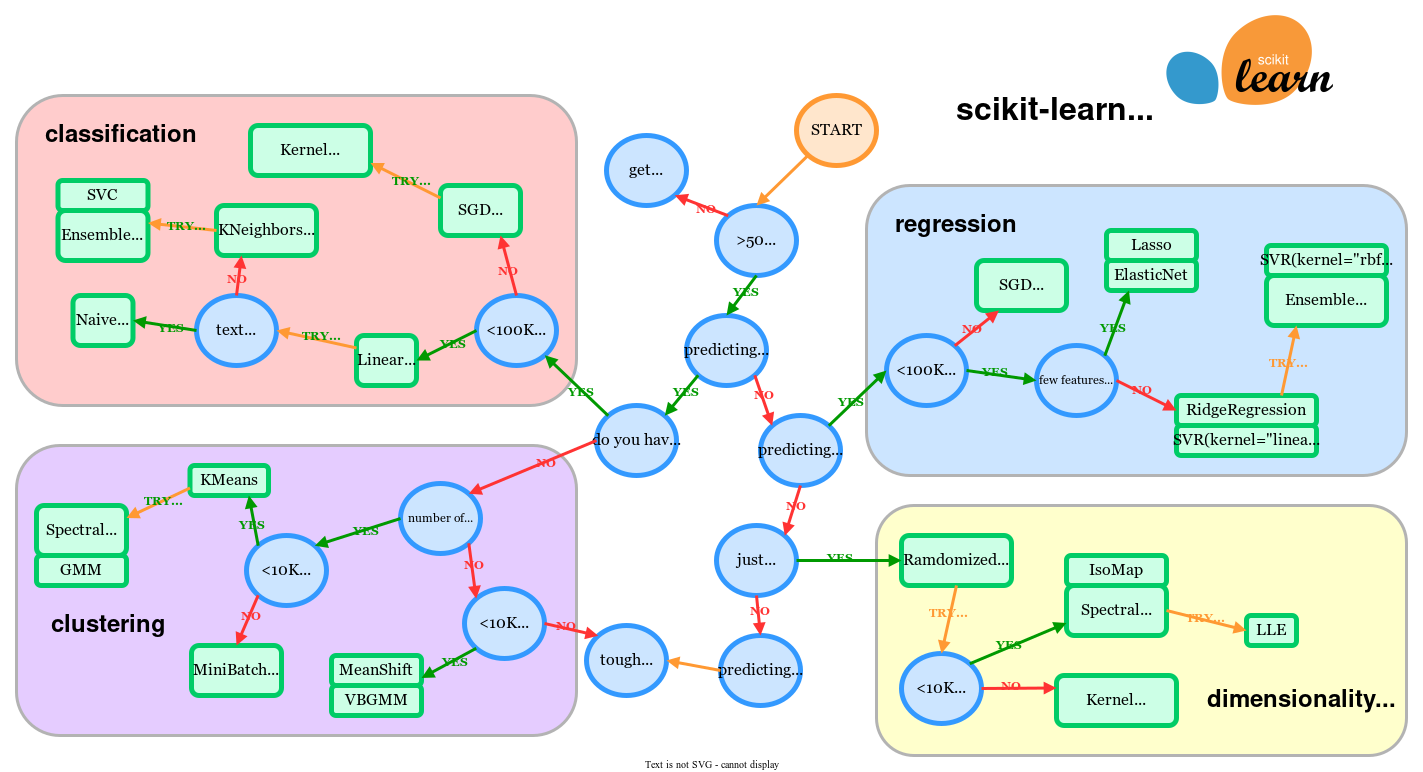

- https://scikit-learn.org/stable/machine_learning_map.html

---
---

# **Anexo I: Algoritmos agrupados por similitud**

## Algoritmos de regresión
La regresión se encarga a modelar la relación entre variables que se refina iterativamente utilizando una medida de error en las predicciones realizadas por el modelo.

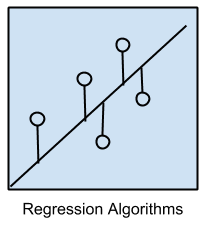

Los métodos de regresión son un caballo de batalla de las estadísticas y se han co-optado en el aprendizaje automático estadístico. Esto puede ser confuso porque podemos usar la regresión para referirnos a la clase de problema y la clase de algoritmo. Realmente, la regresión es un proceso.

Los algoritmos de regresión más populares son:
- Ordinary Least Squares Regression (OLSR)
- Linear Regression
- Logistic Regression
- Stepwise Regression
- Multivariate Adaptive Regression Splines (MARS)
-  Locally Estimated Scatterplot Smoothing (LOESS)

## Algoritmos basados ​​en instancias
El modelado de aprendizaje basado en instancias es un problema de decisión con instancias o ejemplos de datos de capacitación que se consideran importantes o requeridos para el modelo.

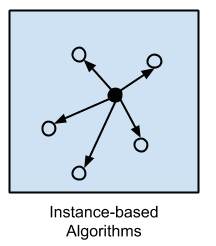

Dichos métodos generalmente construyen una base-de-datos de datos de ejemplo y comparan nuevos datos con la base-de-datos utilizando una medida de similitud para encontrar la mejor coincidencia y hacer una predicción. 

Por esta razón, los métodos basados ​​en instancias también se denominan métodos winner-take-all y aprendizaje basado en la memoria. El enfoque se pone en la representación de las instancias almacenadas y las medidas de similitud utilizadas entre las instancias.

Los algoritmos basados ​​en instancias más populares son:
- k-Nearest Neighbor (kNN)
- Learning Vector Quantization (LVQ)
- Self-Organizing Map (SOM)
- Locally Weighted Learning (LWL)
- Support Vector Machines (SVM)

## Algoritmos de regularización
Una extensión hecha a otro método (típicamente métodos de regresión) que penaliza los modelos basados ​​en su complejidad, favoreciendo modelos más simples que también son mejores para generalizar.

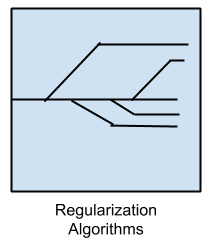


Hemos enumerado algoritmos de regularización por separado aquí porque son modificaciones populares, poderosas y generalmente simples hechas a otros métodos.

Los algoritmos de regularización más populares son:
- Ridge Regression
- Least Absolute Shrinkage and Selection Operator (LASSO)
- Elastic Net
- Least-Angle Regression (LARS)

## Decision Tree Algorithms
Los métodos de árbol de decisión construyen un modelo de toma de decisiones en función de los valores reales de los atributos en los datos.

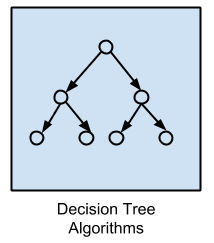

Las decisiones se bifurcan en las estructuras de los árboles hasta que se tome una decisión de predicción para un registro determinado. Los árboles de decisión son entreandos en los datos para problemas de clasificación y regresión. Los árboles de decisión a menudo son rápidos y precisos y un gran favorito en el aprendizaje automático.

Los algoritmos de árbol de decisión más populares son:
- Classification and Regression Tree (CART)
- Iterative Dichotomiser 3 (ID3)
- C4.5 and C5.0 (different versions of a powerful approach)
- Chi-squared Automatic Interaction Detection (CHAID)
- Decision Stump
- M5
- Conditional Decision Trees

## Algoritmos bayesianos
Los métodos bayesianos son aquellos que aplican explícitamente el teorema de Bayes para problemas como la clasificación y la regresión.

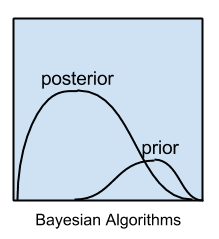

Los algoritmos bayesianos más populares son:
- Naive Bayes
- Gaussian Naive Bayes
- Multinomial Naive Bayes
- Averaged One-Dependence Estimators (AODE)
- Bayesian Belief Network (BBN)
- Bayesian Network (BN)

## Algoritmos de agrupación (Clustering)
La agrupación, como la regresión, describe la clase del problema y la clase de los métodos.


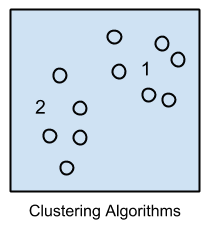

Los métodos de clustering generalmente están organizados por los enfoques de modelado, como los basados ​​en centroides y jerarquales. Todos los métodos se refieren al uso de las estructuras inherentes en los datos para organizar mejor los datos en grupos de máxima propiedades comunes.

Los algoritmos de agrupación más populares son:
- k-Means
- k-Medians
- Expectation Maximisation (EM)
- Hierarchical Clustering

## Algoritmos de aprendizaje de reglas de asociación
Los métodos de aprendizaje de reglas de asociación extraen reglas que mejor explican las relaciones observadas entre las variables en los datos.

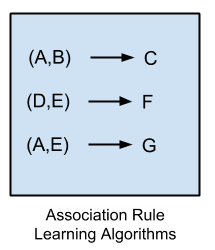

Estas reglas pueden descubrir asociaciones importantes y comercialmente útiles en grandes conjuntos de datos multidimensionales que pueden ser explotados por una organización.

Los algoritmos de aprendizaje de reglas de asociación más populares son:
- Apriori algorithm
- Eclat algorithm

---
---

# **Anexo II: Condiciones de Uso de Algoritmos de Machine Learning en Scikit-Learn**

### **Regresión**
| Algoritmo | Cuándo Usarlo | Condiciones de Uso |
|-----------|-------------|--------------------|
| **Regresión Lineal** (`LinearRegression`) | Cuando la relación entre variables es lineal. | Supone independencia de las variables predictoras, sin multicolinealidad significativa. |
| **Regresión Ridge** (`Ridge`) | Cuando hay multicolinealidad en los datos. | Agrega regularización L2 para evitar sobreajuste. |
| **Regresión Lasso** (`Lasso`) | Cuando se busca selección de características. | Usa regularización L1 para reducir coeficientes a cero, eliminando características irrelevantes. |
| **ElasticNet** (`ElasticNet`) | Cuando se necesita un balance entre Ridge y Lasso. | Mezcla L1 y L2, útil cuando hay muchas variables correlacionadas. |
| **Support Vector Regression (SVR)** (`SVR`) | Para problemas de regresión con datos no lineales. | Sensible a la escala de los datos, requiere normalización. |
| **Random Forest Regressor** (`RandomForestRegressor`) | Cuando se necesita manejar relaciones no lineales y reducir el sobreajuste. | Adecuado para conjuntos de datos grandes y variables con relaciones complejas. |
| **Gradient Boosting Regressor** (`GradientBoostingRegressor`) | Para obtener predicciones de alta precisión en problemas de regresión. | Puede ser propenso al sobreajuste si no se ajusta correctamente. |

### **Clasificación**
| Algoritmo | Cuándo Usarlo | Condiciones de Uso |
|-----------|-------------|--------------------|
| **Regresión Logística** (`LogisticRegression`) | Para clasificación binaria o multiclase cuando los datos son linealmente separables. | Supone independencia de predictores, sensible a valores atípicos. |
| **K-Nearest Neighbors (KNN)** (`KNeighborsClassifier`) | Cuando se necesita un modelo simple y sin supuestos fuertes. | No es eficiente en grandes volúmenes de datos, sensible a la escala de las variables. |
| **Support Vector Machine (SVM)** (`SVC`) | Para clasificación en espacios con dimensiones altas. | Sensible a la escala de los datos, puede ser costoso en grandes volúmenes. |
| **Árbol de Decisión** (`DecisionTreeClassifier`) | Cuando se necesita un modelo interpretable y fácil de visualizar. | Propenso al sobreajuste si no se poda correctamente. |
| **Random Forest** (`RandomForestClassifier`) | Para problemas con muchas variables y cuando se necesita robustez. | Reduce el sobreajuste de los árboles de decisión individuales. |
| **Gradient Boosting** (`GradientBoostingClassifier`) | Para mejorar el rendimiento en problemas complejos de clasificación. | Sensible a hiperparámetros, puede ser más lento que Random Forest. |
| **Naive Bayes** (`GaussianNB`, `MultinomialNB`) | Para clasificación de texto y datos categóricos. | Supone independencia entre las características, no siempre realista. |

### **Agrupamiento (Clustering)**
| Algoritmo | Cuándo Usarlo | Condiciones de Uso |
|-----------|-------------|--------------------|
| **K-Means** (`KMeans`) | Cuando se conoce el número de grupos en los datos. | Sensible a valores atípicos, requiere elección de `k`. |
| **DBSCAN** (`DBSCAN`) | Para datos con densidad variable y detección de outliers. | No requiere definir el número de clusters, pero depende de `eps` y `min_samples`. |
| **Mean Shift** (`MeanShift`) | Cuando no se conoce el número de clusters de antemano. | Automáticamente detecta el número de clusters, pero es computacionalmente costoso. |

### **Reducción de Dimensionalidad**
| Algoritmo | Cuándo Usarlo | Condiciones de Uso |
|-----------|-------------|--------------------|
| **PCA** (`PCA`) | Para reducir la dimensionalidad preservando la varianza de los datos. | Supone que los componentes principales explican la variabilidad más relevante. |
| **t-SNE** (`TSNE`) | Para visualizar datos en espacios de alta dimensión. | Requiere ajuste fino de hiperparámetros (`perplexity` y `learning_rate`). |


---
---

# **Anexo III: Selección de Algoritmos de Machine Learning según Casos de Uso**

| Caso de Uso | Algoritmos Candidatos (orden sugerido) | Orden de Prueba |
|------------|----------------------|----------------|
| **Regresión lineal simple** | `LinearRegression`, `Ridge`, `Lasso`, `ElasticNet` | 1. `LinearRegression` → 2. `Ridge` → 3. `Lasso` → 4. `ElasticNet` |
| **Regresión con datos no lineales** | `DecisionTreeRegressor`, `RandomForestRegressor`, `GradientBoostingRegressor`, `SVR` | 1. `DecisionTreeRegressor` → 2. `RandomForestRegressor` → 3. `GradientBoostingRegressor` → 4. `SVR` |
| **Regresión con muchas variables correlacionadas** | `Ridge`, `Lasso`, `ElasticNet`, `GradientBoostingRegressor` | 1. `Lasso` → 2. `Ridge` → 3. `ElasticNet` → 4. `GradientBoostingRegressor` |
| **Clasificación binaria con datos linealmente separables** | `LogisticRegression`, `SVC (kernel='linear')`, `SGDClassifier` | 1. `LogisticRegression` → 2. `SVC (kernel='linear')` → 3. `SGDClassifier` |
| **Clasificación binaria con datos no lineales** | `SVC (kernel='rbf')`, `RandomForestClassifier`, `GradientBoostingClassifier`, `KNeighborsClassifier` | 1. `SVC (kernel='rbf')` → 2. `RandomForestClassifier` → 3. `GradientBoostingClassifier` → 4. `KNeighborsClassifier` |
| **Clasificación multiclase** | `RandomForestClassifier`, `GradientBoostingClassifier`, `SVC`, `KNeighborsClassifier`, `Naive Bayes` | 1. `RandomForestClassifier` → 2. `GradientBoostingClassifier` → 3. `SVC` → 4. `KNeighborsClassifier` → 5. `Naive Bayes` |
| **Clasificación con datos desbalanceados** | `RandomForestClassifier`, `GradientBoostingClassifier`, `BalancedRandomForestClassifier`, `SMOTE + otro modelo` | 1. `BalancedRandomForestClassifier` → 2. `GradientBoostingClassifier` → 3. `RandomForestClassifier` → 4. `SMOTE + otro modelo` |
| **Clasificación de texto** | `MultinomialNB`, `LogisticRegression`, `RandomForestClassifier` | 1. `MultinomialNB` → 2. `LogisticRegression` → 3. `RandomForestClassifier` |
| **Clasificación de imágenes** | `SVC (kernel='rbf')`, `RandomForestClassifier`, `GradientBoostingClassifier`, `Red Neuronal (MLPClassifier)` | 1. `SVC (kernel='rbf')` → 2. `RandomForestClassifier` → 3. `GradientBoostingClassifier` → 4. `MLPClassifier` |
| **Clustering con número conocido de grupos** | `KMeans`, `GaussianMixture`, `AgglomerativeClustering` | 1. `KMeans` → 2. `GaussianMixture` → 3. `AgglomerativeClustering` |
| **Clustering con número desconocido de grupos** | `DBSCAN`, `MeanShift`, `AgglomerativeClustering` | 1. `DBSCAN` → 2. `MeanShift` → 3. `AgglomerativeClustering` |
| **Detección de anomalías** | `IsolationForest`, `LocalOutlierFactor`, `OneClassSVM` | 1. `IsolationForest` → 2. `LocalOutlierFactor` → 3. `OneClassSVM` |
| **Reducción de dimensionalidad** | `PCA`, `TruncatedSVD`, `t-SNE`, `UMAP` | 1. `PCA` → 2. `TruncatedSVD` → 3. `t-SNE` → 4. `UMAP` |


**Cómo usar esta tabla**
1. Identifica tu caso de uso en la primera columna.
2. Prueba los algoritmos en el orden sugerido de izquierda a derecha.
3. Ajusta hiperparámetros según los resultados para mejorar el rendimiento.

---
---

# **Anexo IV: Selección de candidatos**

Seleccionar el algoritmo de **Machine Learning** adecuado implica evaluar múltiples aspectos para encontrar el equilibrio entre precisión, eficiencia y aplicabilidad. 

Los principales factores a considerar:  


## **1. Características de los Datos**  
- **Dimensionalidad**:  
   - ¿Cuántas características tienen los datos?  
   - ¿Se necesita reducción de dimensionalidad (`PCA`, `t-SNE`, `UMAP`)?  

- **Volumen de datos**:  
   - **Pocos datos**: Modelos simples como `LogisticRegression`, `DecisionTree`.  
   - **Grandes volúmenes**: Modelos escalables como `RandomForest`, `SGDClassifier`.  

- **Tipo de datos**:  
   - **Numéricos**: `LinearRegression`, `RandomForest`.  
   - **Categóricos**: `Naive Bayes`, `DecisionTree`, `OneHotEncoder`.  
   - **Texto**: `TF-IDF + MultinomialNB`, `Word Embeddings + Neural Networks`.  
   - **Imágenes**: `CNNs`, `SVC (kernel='rbf')`.  

- **Distribución y balanceo de clases** (en clasificación):  
   - **Clases balanceadas**: `RandomForest`, `SVC`.  
   - **Clases desbalanceadas**: `BalancedRandomForest`, `SMOTE + otro modelo`.  

- **Linealidad de los datos**:  
   - **Datos linealmente separables**: `LogisticRegression`, `SVM (linear)`.  
   - **Datos no lineales**: `DecisionTree`, `SVC (rbf)`, `Neural Networks`.  

---

## **2. Requisitos de Rendimiento y Escalabilidad**  
- **Tiempo de entrenamiento**:  
   - **Modelos rápidos**: `LinearRegression`, `NaiveBayes`, `KNN` (con pocos datos).  
   - **Modelos lentos**: `SVM (kernel='rbf')`, `Neural Networks`, `RandomForest` (con muchos datos).  

- **Tiempo de inferencia (predicción en producción)**:  
   - **Modelos rápidos en predicción**: `LogisticRegression`, `NaiveBayes`, `DecisionTree`.  
   - **Modelos lentos**: `KNN`, `Neural Networks`, `SVM (kernel='rbf')`.  

- **Escalabilidad (uso en grandes datasets)**:  
   - **Altamente escalables**: `SGDClassifier`, `RandomForest`, `XGBoost`.  
   - **Poco escalables**: `KNN`, `SVM`, `GaussianMixture`.  

---

## **3. Costos Computacionales**  
- **Memoria y uso de CPU/GPU**:  
   - **Bajo consumo**: `LogisticRegression`, `NaiveBayes`, `DecisionTree`.  
   - **Alto consumo**: `Neural Networks`, `SVM`, `GradientBoosting`.  

- **Paralelización y optimización**:  
   - **Modelos fácilmente paralelizables**: `RandomForest`, `XGBoost`.  
   - **Modelos difíciles de paralelizar**: `SVM`, `KNN`.  

---

## **4. Interpretabilidad vs Precisión**  
- **Modelos interpretables** (fáciles de explicar):  
   - `LinearRegression`, `DecisionTree`, `LogisticRegression`.  

- **Modelos de caja negra** (más precisos pero difíciles de explicar):  
   - `RandomForest`, `XGBoost`, `Deep Learning`.  

---

## **5. Métricas de Evaluación**  
- **Regresión**:  
   - `MSE` (Error Cuadrático Medio)  
   - `MAE` (Error Absoluto Medio)  
   - `R²` (Coeficiente de Determinación)  

- **Clasificación**:  
   - `Accuracy` (precisión global)  
   - `F1-score` (balance entre precisión y recall)  
   - `AUC-ROC` (rendimiento en clasificación binaria)  

- **Clustering**:  
   - `Silhouette Score`  
   - `Inertia` (para `KMeans`)  

---

## **6. Robustez y Capacidad de Generalización**  
- **Sobreajuste vs Subajuste**:  
   - Modelos muy complejos (`Neural Networks`, `RandomForest`) pueden sobreajustar.  
   - Modelos simples (`LinearRegression`, `LogisticRegression`) pueden subajustar.  

- **Regularización y control de complejidad**:  
   - `Lasso` y `Ridge` para controlar sobreajuste en regresión.  
   - `Pruning` en `DecisionTree`.  
   - `Dropout` en redes neuronales.  

---


Para elegir el mejor algoritmo, debes considerar:  
✔ **Tus datos (tipo, volumen, distribución)**  
✔ **Tiempo y recursos computacionales disponibles**  
✔ **Necesidad de interpretabilidad vs precisión**  
✔ **Riesgo de sobreajuste/subajuste**  

> **Tip**: Empieza con modelos simples e interpretables (`LogisticRegression`, `RandomForest`) y luego prueba modelos más complejos si es necesario.

---
---

# **Anexo V: Umbrales de métricas**

Umbrales para interpretar las métricas en función del contexto del problema y la relación con el target:

| **Métrica**       | **Estadística del Target a Evaluar** | **Valor Excelente**                                                                 | **Valor Bueno**                                                                 | **Valor Malo**                                                                 | **Valor Pésimo**                                                              |
|--------------------|---------------------------------------|-------------------------------------------------------------------------------------|---------------------------------------------------------------------------------|--------------------------------------------------------------------------------|-------------------------------------------------------------------------------|
| **MSE (Mean Squared Error)** | Varianza del Target                  | MSE < 25% de la varianza del target                                                 | MSE entre 25%-50% de la varianza del target                                     | MSE entre 50%-75% de la varianza del target                                    | MSE > 75% de la varianza del target                                           |
| **MAE (Mean Absolute Error)** | Media del Target                     | MAE < 5% de la media del target                                                     | MAE entre 5%-10% de la media del target                                         | MAE entre 10%-20% de la media del target                                       | MAE > 20% de la media del target                                              |
| **R² (Coeficiente de Determinación)** | Varianza del Target                  | R² > 0.9 (explica más del 90% de la varianza)                                       | R² entre 0.7-0.9 (explica entre 70%-90% de la varianza)                         | R² entre 0.3-0.7 (explica entre 30%-70% de la varianza)                        | R² < 0.3 (explica menos del 30% de la varianza)                               |
| **Accuracy**       | Proporción de Clases Mayoritarias     | Accuracy > 0.9 (en problemas balanceados)                                           | Accuracy entre 0.8-0.9                                                          | Accuracy entre 0.6-0.8                                                         | Accuracy < 0.6                                                                |
| **F1-Score**       | Distribución de Clases                | F1-Score > 0.9 (excelente equilibrio entre precisión y recall)                      | F1-Score entre 0.7-0.9                                                          | F1-Score entre 0.5-0.7                                                         | F1-Score < 0.5                                                                |
| **Precision**      | Proporción de Clases Positivas        | Precision > 0.9 (muy baja tasa de falsos positivos)                                 | Precision entre 0.8-0.9                                                         | Precision entre 0.5-0.8                                                        | Precision < 0.5                                                               |
| **Recall**         | Proporción de Clases Positivas        | Recall > 0.9 (muy baja tasa de falsos negativos)                                    | Recall entre 0.7-0.9                                                            | Recall entre 0.5-0.7                                                           | Recall < 0.5                                                                  |
| **ROC-AUC**        | Distribución de Probabilidades        | ROC-AUC > 0.9 (excelente poder discriminativo)                                      | ROC-AUC entre 0.8-0.9                                                           | ROC-AUC entre 0.6-0.8                                                          | ROC-AUC < 0.6                                                                 |
| **Log Loss**       | Entropía del Target                   | Log Loss < 0.1 (probabilidades extremadamente bien calibradas)                      | Log Loss entre 0.1-0.5                                                          | Log Loss entre 0.5-1.0                                                         | Log Loss > 1.0                                                                |